# **Muhammad Zalfa Thoriq**
# **1301194473**

#**IF-42-GAB05**

# **Tugas Week 11 GEOSPATIAL**

In [6]:
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 11.8 MB/s 
     |████████████████████████████████| 10.8 MB 46.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 35.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 31.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 46.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 6.3 MB 47.9 MB/s 
     |████████████████████████████████| 16.7 MB 36.8 MB/s 
     |████████████████████████████████|

In [99]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

%matplotlib inline

In [8]:
from google.colab import files
covid = files.upload()

Saving gadm36_IDN_1.cpg to gadm36_IDN_1.cpg
Saving gadm36_IDN_1.dbf to gadm36_IDN_1.dbf
Saving gadm36_IDN_1.prj to gadm36_IDN_1.prj
Saving gadm36_IDN_1.shp to gadm36_IDN_1.shp
Saving gadm36_IDN_1.shx to gadm36_IDN_1.shx
Saving gadm36_IDN_2.cpg to gadm36_IDN_2.cpg


In [100]:
data_1 = gpd.read_file("gadm36_IDN_1.shp")
data_1

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,None,None,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,IDN,Indonesia,IDN.2_1,Bali,None,None,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,None,None,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,IDN,Indonesia,IDN.4_1,Banten,None,None,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,IDN,Indonesia,IDN.5_1,Bengkulu,None,None,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."
5,IDN,Indonesia,IDN.6_1,Gorontalo,None,None,Propinisi,Province,75,ID.GO,"MULTIPOLYGON (((121.41933 0.41357, 121.41941 0..."
6,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,None,Propinisi,Province,31,ID.JK,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ..."
7,IDN,Indonesia,IDN.8_1,Jambi,None,None,Propinisi,Province,15,ID.JA,"MULTIPOLYGON (((104.40900 -0.85951, 104.40870 ..."
8,IDN,Indonesia,IDN.9_1,Jawa Barat,None,None,Propinisi,Province,32,ID.JR,"MULTIPOLYGON (((108.68501 -6.76990, 108.68410 ..."
9,IDN,Indonesia,IDN.10_1,Jawa Tengah,None,None,Propinisi,Province,33,ID.JT,"MULTIPOLYGON (((108.88353 -7.74846, 108.88322 ..."


In [15]:
from google.colab import files
data_cov = files.upload()

Saving datacovid2021.xlsx to datacovid2021 (1).xlsx


In [101]:
data_cov = pd.read_excel("datacovid2021.xlsx")
data_cov.head()

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?
0,2021-05-01,11169.0,44813.0,47396.0,13646.0,6884.0,39644.0,409546.0,7730.0,281959.0,184441.0,147977.0,7836.0,68765.0,20179.0,33046.0,11752.0,11355.0,10459.0,20595.0,37110.0,15656.0,29458.0,10427.0,61520.0,12302.0,16041.0,44654.0,4417.0,7530.0,8974.0,20365.0,5450.0,14384.0,5400.0,0.0
1,2021-05-02,11293.0,45004.0,47577.0,13821.0,6966.0,39981.0,411157.0,7890.0,283923.0,185151.0,148398.0,7931.0,68901.0,20302.0,33092.0,11804.0,11653.0,10617.0,20838.0,37438.0,15657.0,29590.0,10427.0,61537.0,12372.0,16211.0,45578.0,4420.0,7549.0,8987.0,20365.0,5474.0,14697.0,5403.0,0.0
2,2021-05-03,11293.0,45004.0,47577.0,13821.0,6966.0,39981.0,411157.0,7890.0,283923.0,185151.0,148398.0,7931.0,68901.0,20302.0,33092.0,11804.0,11653.0,10617.0,20838.0,37438.0,15657.0,29590.0,10427.0,61537.0,12372.0,16211.0,45578.0,4420.0,7549.0,8987.0,20365.0,5474.0,14697.0,5403.0,0.0
3,2021-05-04,11482.0,45282.0,47762.0,14113.0,7055.0,40372.0,412418.0,8042.0,285830.0,186056.0,148959.0,8164.0,69175.0,20494.0,33256.0,11824.0,11881.0,10673.0,21078.0,37845.0,15665.0,29724.0,10441.0,61564.0,12423.0,16340.0,46631.0,4428.0,7567.0,9031.0,20386.0,5475.0,14811.0,5411.0,0.0
4,2021-05-05,11482.0,45282.0,47762.0,14113.0,7055.0,40372.0,412418.0,8042.0,285830.0,186056.0,148959.0,8164.0,69175.0,20494.0,33256.0,11824.0,11881.0,10673.0,21078.0,37845.0,15665.0,29724.0,10441.0,61564.0,12423.0,16340.0,46631.0,4428.0,7567.0,9031.0,20386.0,5475.0,14811.0,5411.0,0.0


In [102]:
data_cov = pd.read_excel("datacovid2021.xlsx")
data_cov.head()

,Total Kasus,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo,?
0,2021-05-01,11169.0,44813.0,47396.0,13646.0,6884.0,39644.0,409546.0,7730.0,281959.0,184441.0,147977.0,7836.0,68765.0,20179.0,33046.0,11752.0,11355.0,10459.0,20595.0,37110.0,15656.0,29458.0,10427.0,61520.0,12302.0,16041.0,44654.0,4417.0,7530.0,8974.0,20365.0,5450.0,14384.0,5400.0,0.0
1,2021-05-02,11293.0,45004.0,47577.0,13821.0,6966.0,39981.0,411157.0,7890.0,283923.0,185151.0,148398.0,7931.0,68901.0,20302.0,33092.0,11804.0,11653.0,10617.0,20838.0,37438.0,15657.0,29590.0,10427.0,61537.0,12372.0,16211.0,45578.0,4420.0,7549.0,8987.0,20365.0,5474.0,14697.0,5403.0,0.0
2,2021-05-03,11293.0,45004.0,47577.0,13821.0,6966.0,39981.0,411157.0,7890.0,283923.0,185151.0,148398.0,7931.0,68901.0,20302.0,33092.0,11804.0,11653.0,10617.0,20838.0,37438.0,15657.0,29590.0,10427.0,61537.0,12372.0,16211.0,45578.0,4420.0,7549.0,8987.0,20365.0,5474.0,14697.0,5403.0,0.0
3,2021-05-04,11482.0,45282.0,47762.0,14113.0,7055.0,40372.0,412418.0,8042.0,285830.0,186056.0,148959.0,8164.0,69175.0,20494.0,33256.0,11824.0,11881.0,10673.0,21078.0,37845.0,15665.0,29724.0,10441.0,61564.0,12423.0,16340.0,46631.0,4428.0,7567.0,9031.0,20386.0,5475.0,14811.0,5411.0,0.0
4,2021-05-05,11482.0,45282.0,47762.0,14113.0,7055.0,40372.0,412418.0,8042.0,285830.0,186056.0,148959.0,8164.0,69175.0,20494.0,33256.0,11824.0,11881.0,10673.0,21078.0,37845.0,15665.0,29724.0,10441.0,61564.0,12423.0,16340.0,46631.0,4428.0,7567.0,9031.0,20386.0,5475.0,14811.0,5411.0,0.0


In [103]:
data_cov.columns[1:-1]

Index(['Aceh', 'Bali', 'Banten', 'Babel', 'Bengkulu', 'DIY', 'Jakarta',
       'Jambi', 'Jabar', 'Jateng', 'Jatim', 'Kalbar', 'Kaltim', 'Kalteng',
       'Kalsel', 'Kaltara', 'Kep Riau', 'NTB', 'Sumsel', 'Sumbar', 'Sulut',
       'Sumut', 'Sultra', 'Sulsel', 'Sulteng', 'Lampung', 'Riau', 'Malut',
       'Maluku', 'Papbar', 'Papua', 'Sulbar', 'NTT', 'Gorontalo'],
      dtype='object')

In [104]:
baru = data_cov.rename({
    
    'Jakarta': 'Jakarta Raya',
    'Jabar': 'Jawa Barat',
    'Jateng': 'Jawa Tengah',
    'Jatim': 'Jawa Timur',
    'Babel': 'Bangka Belitung',
    'DIY': 'Yogyakarta',
    'Kalbar': 'Kalimantan Barat',
    'Kaltim': 'Kalimantan Timur',
    'Kalteng': 'Kalimantan Tengah',
    'Kalsel': 'Kalimantan Selatan',
    'Kaltara': 'Kalimantan Utara',
    'Kep Riau': 'Kepulauan Riau',
    'NTB': 'Nusa Tenggara Barat',
    'Sumsel': 'Sumatera Selatan',
    'Sumbar': 'Sumatera Barat',
    'Sulut': 'Sulawesi Utara',
    'Sumut': 'Sumatera Utara',
    'Sultra': 'Sulawesi Tenggara',
    'Sulsel': 'Sulawesi Selatan',
    'Sulteng': 'Sulawesi Tengah',
    'Malut': 'Maluku Utara',
    'Papbar': 'Papua Barat',
    'Sulbar': 'Sulawesi Barat',
    'NTT': 'Nusa Tenggara Timur'
    
    }, axis=1)

In [105]:
baru.reset_index().head()

,index,Total Kasus,Aceh,Bali,Banten,Bangka Belitung,Bengkulu,Yogyakarta,Jakarta Raya,Jambi,Jawa Barat,Jawa Tengah,Jawa Timur,Kalimantan Barat,Kalimantan Timur,Kalimantan Tengah,Kalimantan Selatan,Kalimantan Utara,Kepulauan Riau,Nusa Tenggara Barat,Sumatera Selatan,Sumatera Barat,Sulawesi Utara,Sumatera Utara,Sulawesi Tenggara,Sulawesi Selatan,Sulawesi Tengah,Lampung,Riau,Maluku Utara,Maluku,Papua Barat,Papua,Sulawesi Barat,Nusa Tenggara Timur,Gorontalo,?
0,0,2021-05-01,11169.0,44813.0,47396.0,13646.0,6884.0,39644.0,409546.0,7730.0,281959.0,184441.0,147977.0,7836.0,68765.0,20179.0,33046.0,11752.0,11355.0,10459.0,20595.0,37110.0,15656.0,29458.0,10427.0,61520.0,12302.0,16041.0,44654.0,4417.0,7530.0,8974.0,20365.0,5450.0,14384.0,5400.0,0.0
1,1,2021-05-02,11293.0,45004.0,47577.0,13821.0,6966.0,39981.0,411157.0,7890.0,283923.0,185151.0,148398.0,7931.0,68901.0,20302.0,33092.0,11804.0,11653.0,10617.0,20838.0,37438.0,15657.0,29590.0,10427.0,61537.0,12372.0,16211.0,45578.0,4420.0,7549.0,8987.0,20365.0,5474.0,14697.0,5403.0,0.0
2,2,2021-05-03,11293.0,45004.0,47577.0,13821.0,6966.0,39981.0,411157.0,7890.0,283923.0,185151.0,148398.0,7931.0,68901.0,20302.0,33092.0,11804.0,11653.0,10617.0,20838.0,37438.0,15657.0,29590.0,10427.0,61537.0,12372.0,16211.0,45578.0,4420.0,7549.0,8987.0,20365.0,5474.0,14697.0,5403.0,0.0
3,3,2021-05-04,11482.0,45282.0,47762.0,14113.0,7055.0,40372.0,412418.0,8042.0,285830.0,186056.0,148959.0,8164.0,69175.0,20494.0,33256.0,11824.0,11881.0,10673.0,21078.0,37845.0,15665.0,29724.0,10441.0,61564.0,12423.0,16340.0,46631.0,4428.0,7567.0,9031.0,20386.0,5475.0,14811.0,5411.0,0.0
4,4,2021-05-05,11482.0,45282.0,47762.0,14113.0,7055.0,40372.0,412418.0,8042.0,285830.0,186056.0,148959.0,8164.0,69175.0,20494.0,33256.0,11824.0,11881.0,10673.0,21078.0,37845.0,15665.0,29724.0,10441.0,61564.0,12423.0,16340.0,46631.0,4428.0,7567.0,9031.0,20386.0,5475.0,14811.0,5411.0,0.0


In [106]:
for i in range(len(data_1.groupby('NAME_1').sum().index)):
  x = data_1.groupby('NAME_1').sum().index[i]
  y = baru.columns
  z = x in y
  if not z:
    print(f'Daerah {x} tidak terdapat pada kolom')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.a

In [107]:
gab = data_1.merge(baru.T.reset_index(), left_on='NAME_1', right_on='index').drop(['GID_0', 'NAME_0', 'GID_1', 'VARNAME_1', 'NL_NAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'index'], axis=1)
gab.head()

,NAME_1,geometry,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152
0,Aceh,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1...",11169.0,11293.0,11293.0,11482.0,11482.0,11702.0,11702.0,11830.0,11830.0,11998.0,11998.0,12152.0,12152.0,12214.0,12214.0,12340.0,12340.0,12615.0,12615.0,12990.0,12990.0,13229.0,13229.0,13581.0,13581.0,14078.0,14078.0,14631.0,14631.0,15017.0,15017.0,15240.0,15240.0,15663.0,15663.0,16065.0,16065.0,16352.0,16352.0,16825.0,16825.0,17217.0,17217.0,17542.0,17542.0,17830.0,17830.0,18120.0,18120.0,18329.0,18329.0,18439.0,18439.0,18668.0,18668.0,18852.0,18852.0,19015.0,19015.0,19246.0,19246.0,19432.0,19432.0,19576.0,19576.0,19784.0,19784.0,20060.0,20060.0,20273.0,20273.0,20376.0,20376.0,20654.0,20654.0,20817.0,20817.0,20949.0,20949.0,21012.0,21012.0,21166.0,21166.0,21523.0,21523.0,21883.0,21883.0,22346.0,22346.0,22817.0,22817.0,23249.0,23249.0,23570.0,23570.0,24206.0,24206.0,24932.0,24932.0,25369.0,25369.0,26133.0,26133.0,26725.0,26725.0,27432.0,27432.0,28163.0,28163.0,28901.0,28901.0,29742.0,29742.0,30305.0,30305.0,31027.0,31027.0,31776.0,31776.0,32418.0,32418.0,32935.0,32935.0,33568.0,33568.0,34139.0,34139.0,34565.0,34565.0,35096.0,35096.0,35576.0,35576.0,35908.0,35908.0,36184.0,36184.0,36458.0,36458.0,36778.0,36778.0,36953.0,36953.0,37239.0,37239.0,37394.0,37394.0,37526.0,37526.0,37631.0,37631.0,37733.0,37733.0
1,Bali,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ...",44813.0,45004.0,45004.0,45282.0,45282.0,45542.0,45542.0,45758.0,45758.0,45933.0,45933.0,46124.0,46124.0,46216.0,46216.0,46364.0,46364.0,46555.0,46555.0,46738.0,46738.0,46856.0,46856.0,46973.0,46973.0,47063.0,47063.0,47173.0,47173.0,47259.0,47259.0,47320.0,47320.0,47417.0,47417.0,47472.0,47472.0,47544.0,47544.0,47642.0,47642.0,47710.0,47710.0,47802.0,47802.0,47924.0,47924.0,48084.0,48084.0,48345.0,48345.0,48563.0,48563.0,48931.0,48931.0,49372.0,49372.0,49758.0,49758.0,50217.0,50217.0,50871.0,50871.0,51498.0,51498.0,52323.0,52323.0,53405.0,53405.0,54757.0,54757.0,55974.0,55974.0,57488.0,57488.0,59216.0,59216.0,61179.0,61179.0,62896.0,62896.0,65257.0,65257.0,67721.0,67721.0,69789.0,69789.0,72555.0,72555.0,75039.0,75039.0,77465.0,77465.0,79917.0,79917.0,82749.0,82749.0,85015.0,85015.0,87217.0,87217.0,89898.0,89898.0,93161.0,93161.0,96027.0,96027.0,97903.0,97903.0,99669.0,99669.0,101557.0,101557.0,102574.0,102574.0,104254.0,104254.0,105377.0,105377.0,106153.0,106153.0,106834.0,106834.0,107562.0,107562.0,108304.0,108304.0,108763.0,108763.0,109356.0,109356.0,109865.0,109865.0,110244.0,110244.0,110613.0,110613.0,110912.0,110912.0,111285.0,111285.0,111499.0,111499.0,111804.0,111804.0,112059.0,112059.0,112249.0,112249.0,112408.0,112408.0,112582.0,112582.0
2,Bangka Belitung,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...",13646.0,13821.0,13821.0,14113.0,14113.0,14478.0,14478.0,14929.0,14929.0,15184.0,15184.0,15468.0,15468.0,15574.0,15574.0,15757.0,15757.0,16052.0,16052.0,16486.0,16486.0,16859.0,16859.0,17160.0,17160.0,17563.0,17563.0,17922.0,17922.0,18297.0,18297.0,18487.0,18487.0,18925.0,18925.0,19126.0,19126.0,19307.0,19307.0,19504.0,19504.0,19658.0,19658.0,19745.0,19745.0,19911.0,19911.0,20076.0,20076.0,20206.0,20206.0,20336.0,20336.0,20546.0,20546.0,20740.0,20740.0,20945.0,20945.0,21192.0,21192.0,21643.0,21643.0,21976.0,21976.0,22390.0,22390.0,22901.0,22901.0,23510.0,23510.0,23990.0,23990.0,25014.0,25014.0,25982.0,25982.0,26777.0,26777.0,27335.0,27335.0,28149.0,28149.0,29382.0,29382.0,30260.0,30260.0,31601.0,31601.0,32794.0,32794.0,33823.0,33823.0,34998.0,34998.0,36657.0,36657.0,38144.0,38144.0,38836.0,388

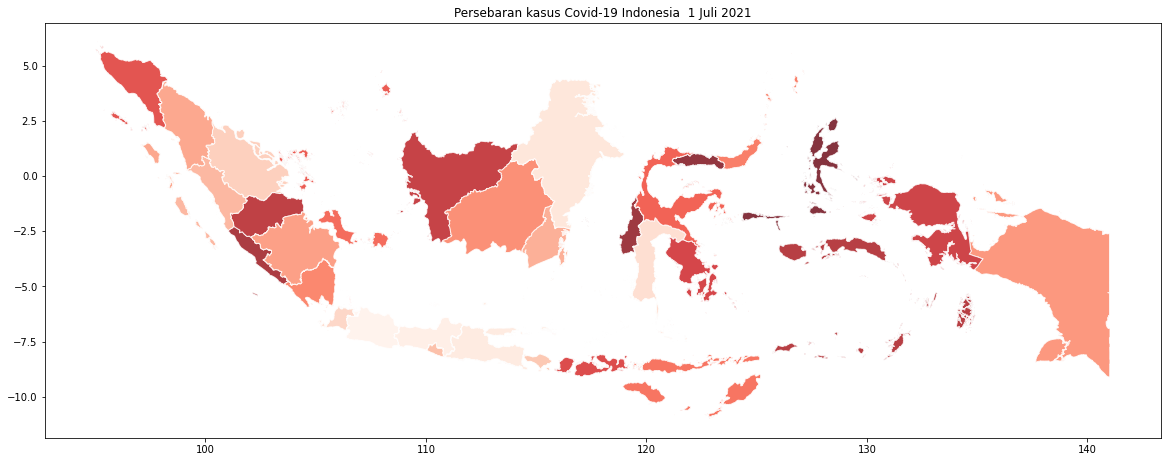

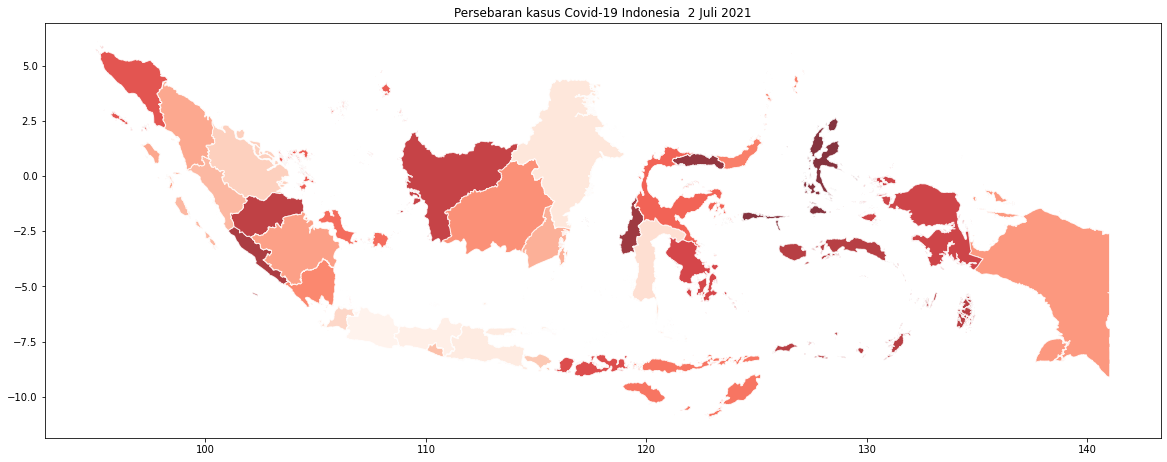

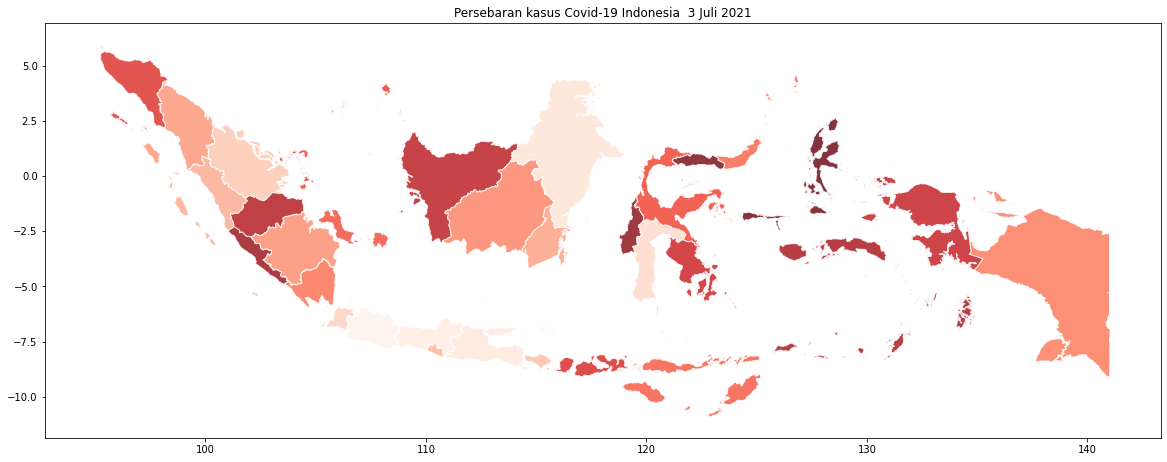

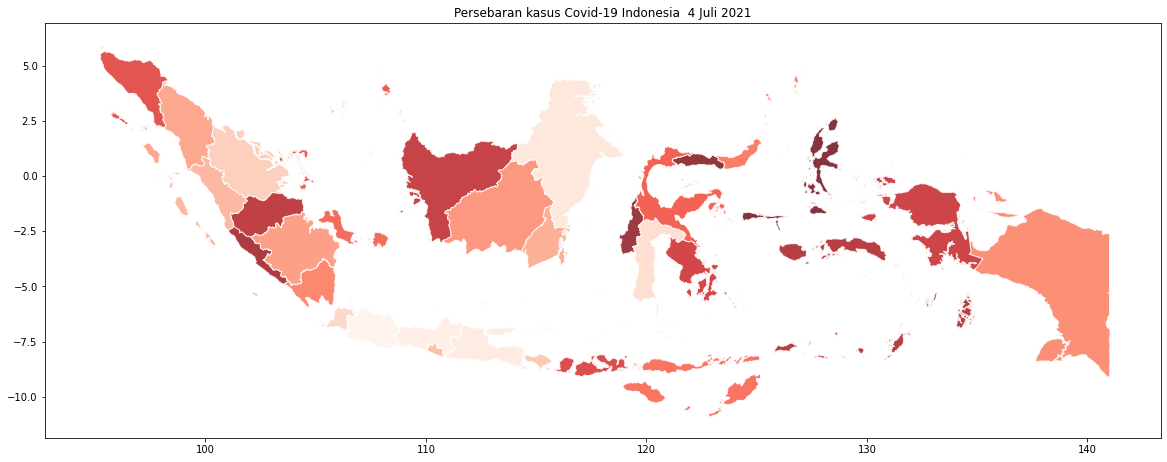

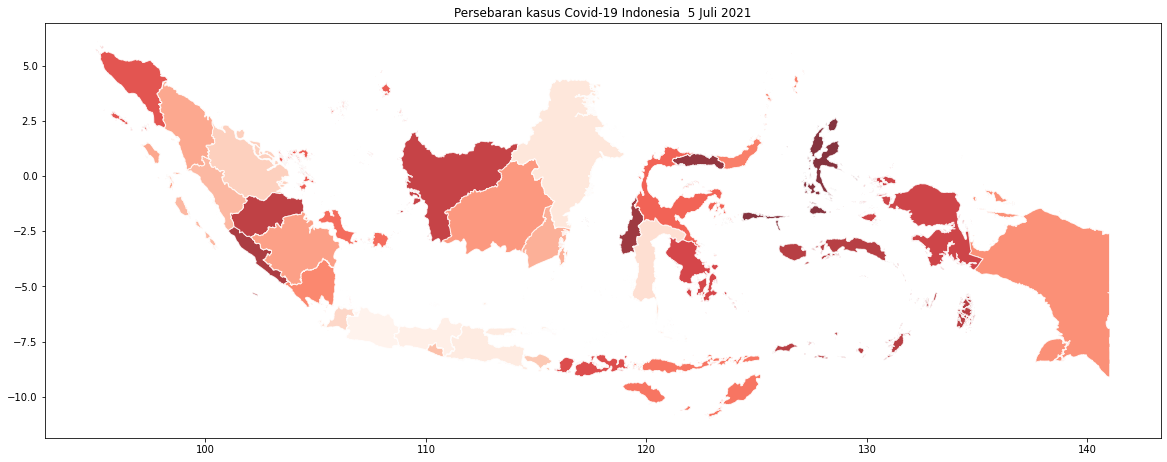

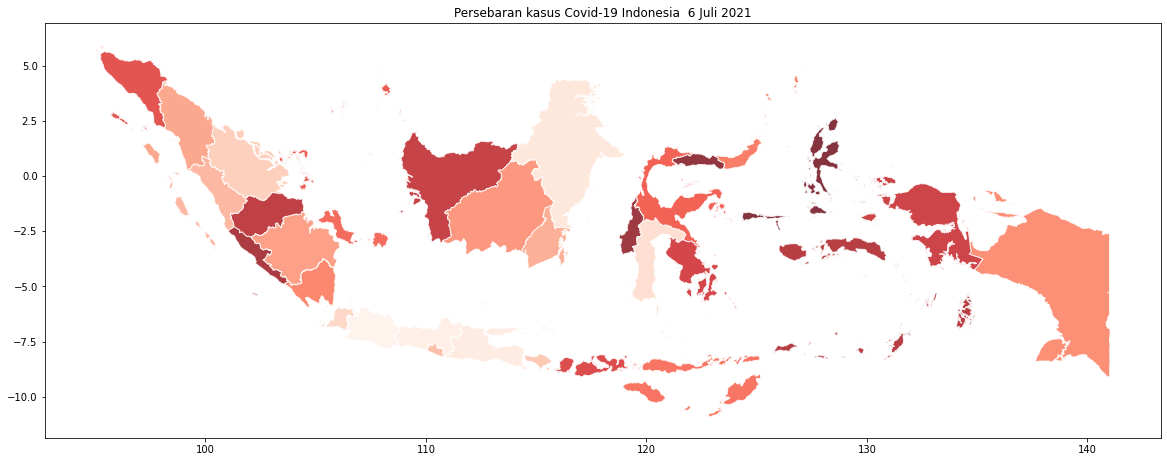

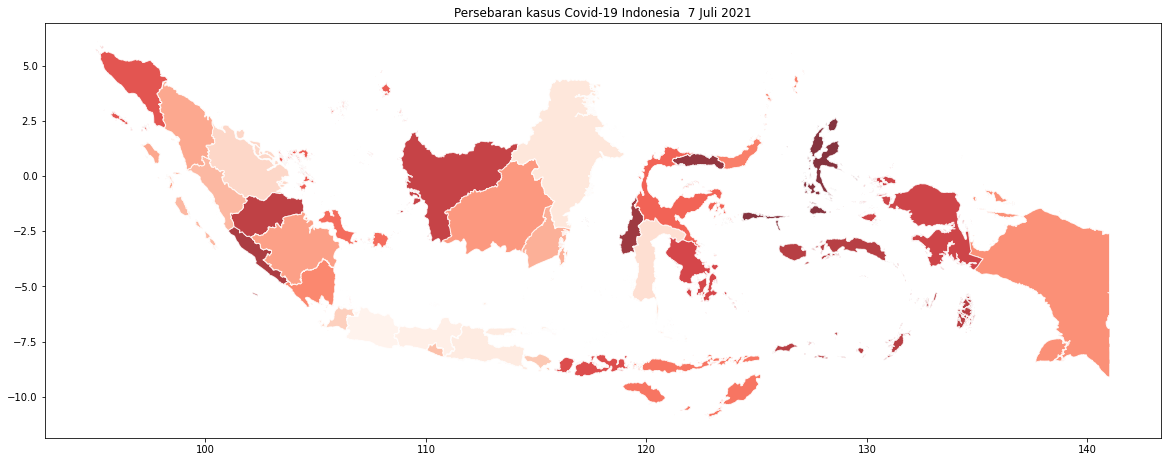

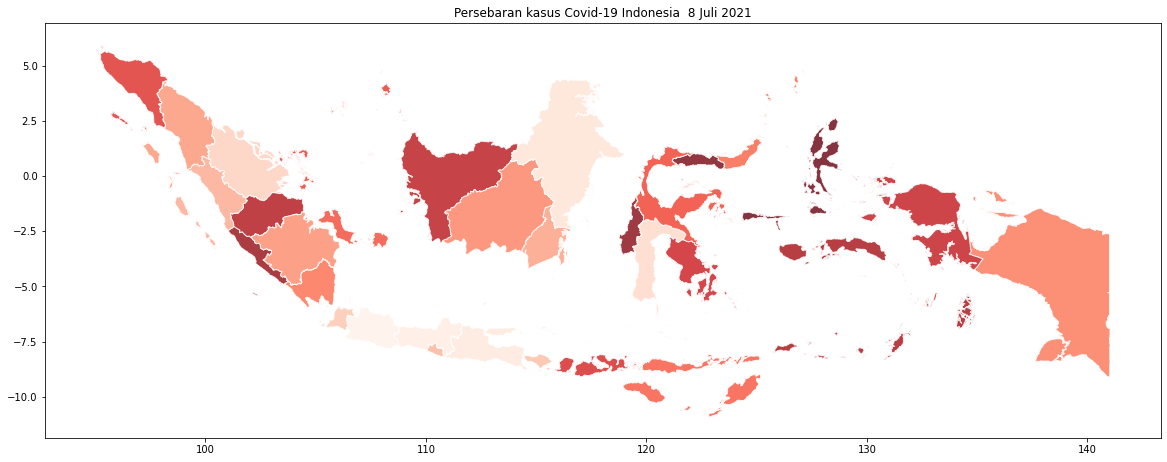

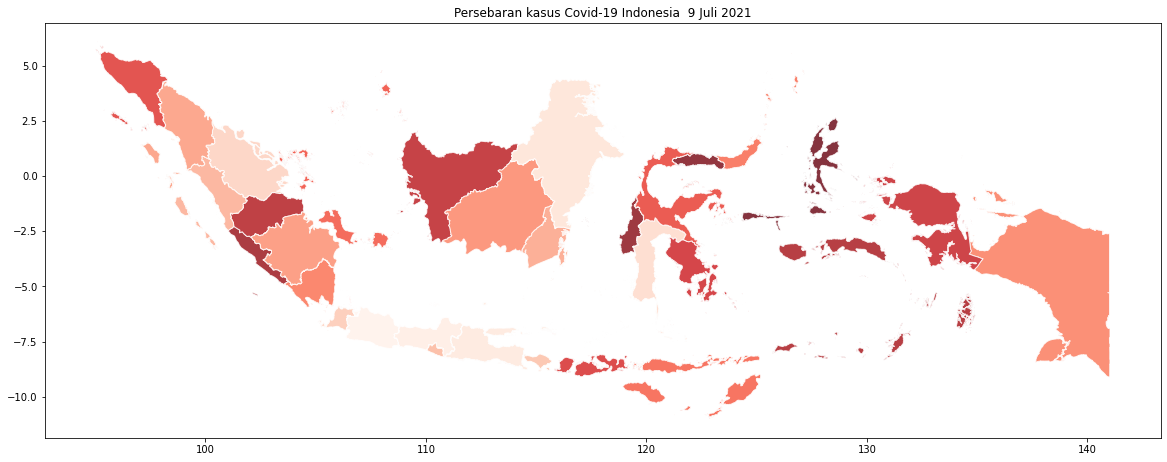

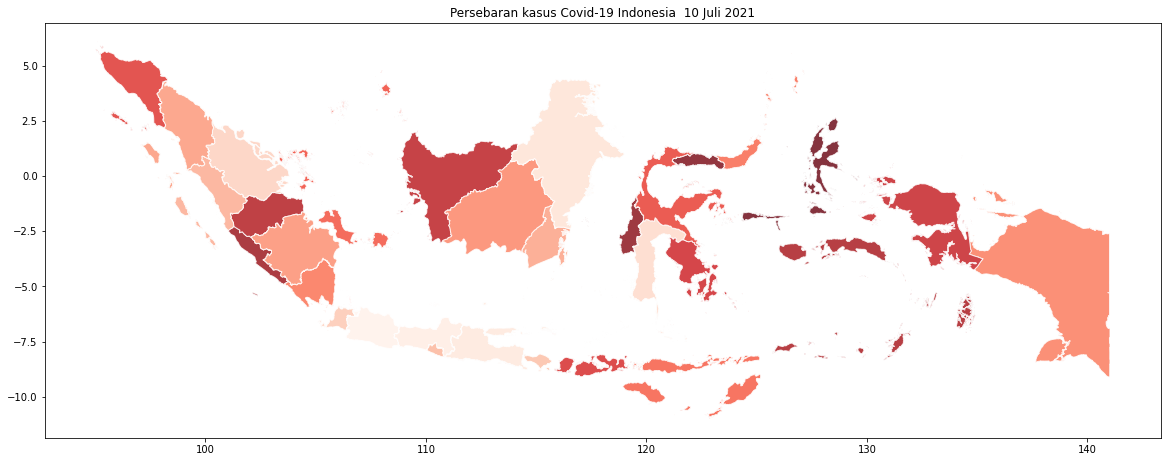

In [113]:
anim_path = pathlib.Path("ani/")
anim_path.mkdir(parents=True, exist_ok=True)

tanggal = 0
image_files = []

for i in range(1,11):
  gab.plot(
    figsize=(20, 9),
    column=gab[i],
    cmap='Reds_r',
    alpha=.8,
    edgecolor='white'
    
  )

  tanggal += 1
  plt.title(f'Persebaran kasus Covid-19 Indonesia  {tanggal} Juli 2021')

  file_name = str(anim_path / "{}.png".format(tanggal))
  plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
  image_files.append(file_name)

In [114]:
images = []

for file_name in image_files:
    images.append(imageio.imread(file_name))

gif_path = "Gambar.gif"
imageio.mimsave(gif_path, images, fps=2)

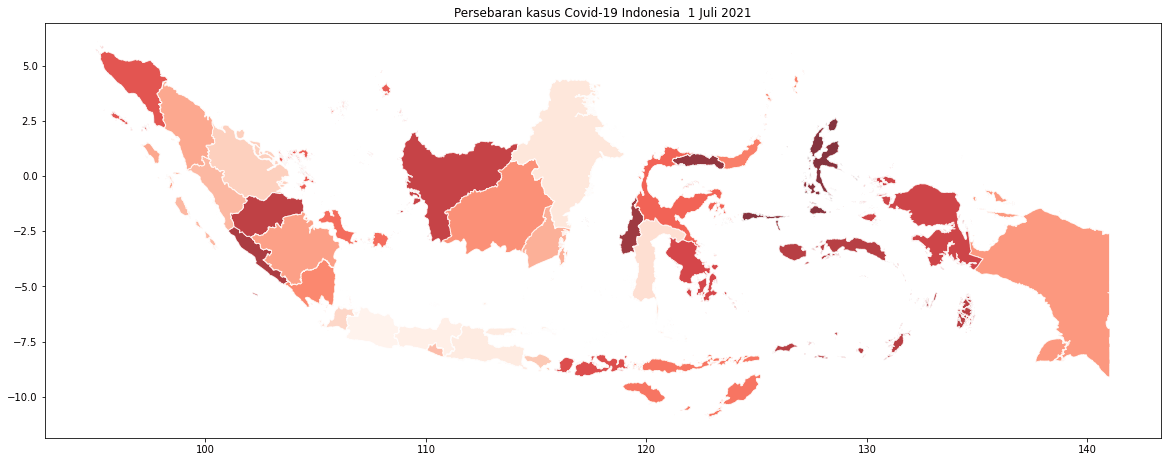

In [115]:
from IPython.display import Image

Image(open('Gambar.gif','rb').read())